<a href="https://colab.research.google.com/github/efecantepe/IE423/blob/main/hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
from datetime import datetime, timedelta

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/continuous dataset.csv')

df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


In [10]:
df.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

### Converting datetime to panda date time object

In [14]:
df['datetime'] = pd.to_datetime(df['datetime'])

From above you can see there is no missing value

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x791209b792d0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x791209b78550> (for post_execute):


KeyboardInterrupt: 

## For working with time series, I will first ensure the data frequency to hourly

In [16]:
df.set_index(['datetime'], inplace=True)
df = df.resample('H').sum()
df.index.freq = 'H'

## National Demand and Time Correlation

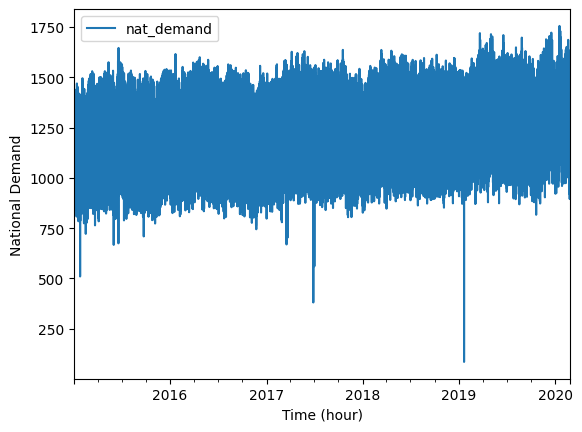

In [18]:
df[['nat_demand']]['2013-01-03': '2020-02-27'].plot()
plt.xlabel('Time (hour)')
plt.ylabel('National Demand')
plt.show()

## Autocorrelation According to Gross Con

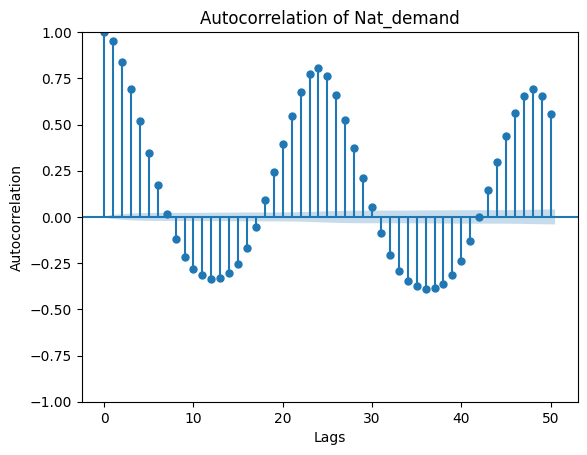

In [21]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation for 'GrossCon' column
plot_acf(df['nat_demand'].dropna(), lags=50)  # Adjust the number of lags as needed
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Nat_demand')
plt.show()


## Correlation Heatmap

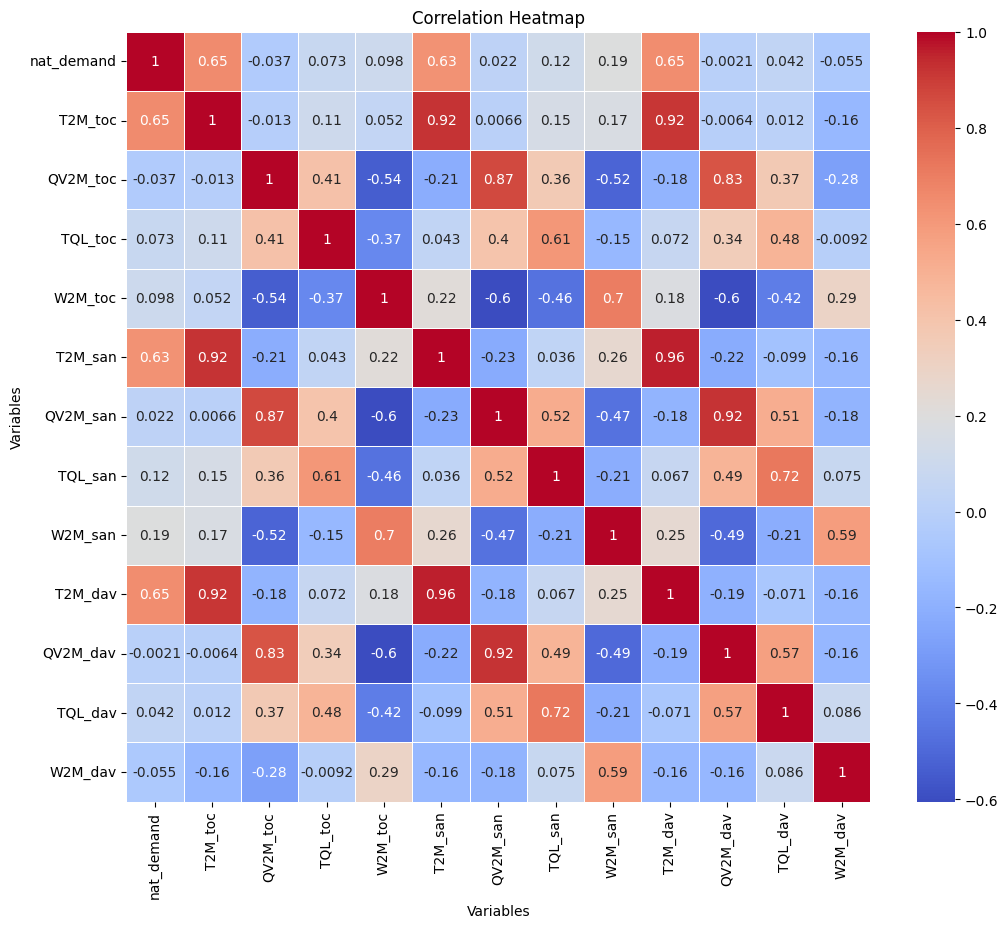

In [24]:


# Calculate the correlation matrix
correlation_matrix = df[['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
                             'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san',
                             'T2M_dav', 'QV2M_dav', 'TQL_dav', 'W2M_dav']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the labels and title
plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()



# Exponential Smoothing





In [ ]:
!pip install pandas statsmodels matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing



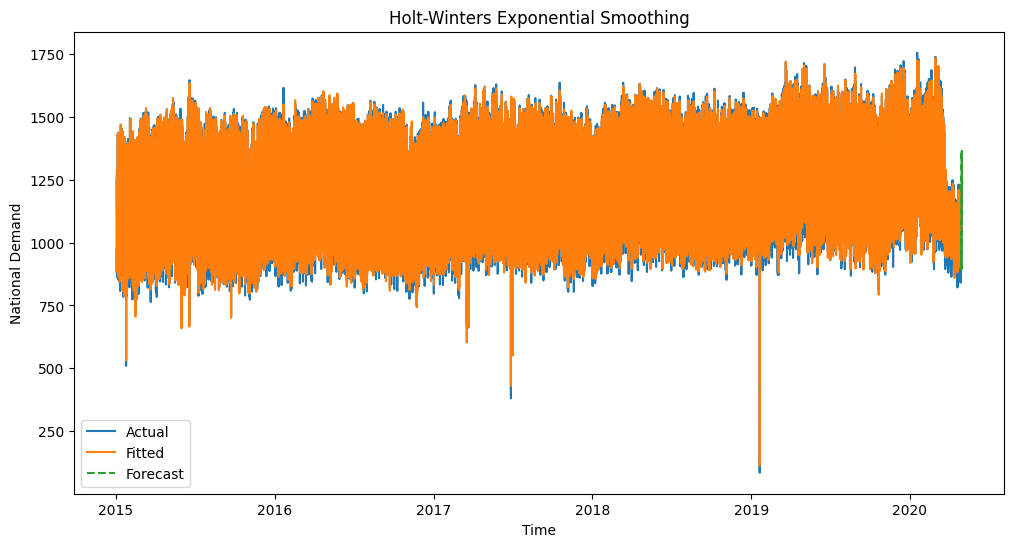

In [25]:


data = df['nat_demand']['2015-01-03':'2020-04-27']

# Fit the Holt-Winters model
model = ExponentialSmoothing(data, seasonal='add', seasonal_periods=24)
fit = model.fit()

forecast = fit.forecast(steps=48)

plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual')
plt.plot(fit.fittedvalues, label='Fitted')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('National Demand')
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()



## Model Evaluation on Test Data with Splitting

In [28]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


data = df['nat_demand']['2015-01-03':'2020-06-27']
# Define the split point
split_point = int(len(data) * 0.8)
train, test = data[:split_point], data[split_point:]

# Fit the Holt-Winters model on the training set
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=24)
fit = model.fit()

# Make predictions on the test set
predictions = fit.forecast(len(test))



In [29]:
# Calculate evaluation metrics
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 38516.520350110965
Mean Absolute Error (MAE): 153.14030444497863
Root Mean Squared Error (RMSE): 196.2562619385964


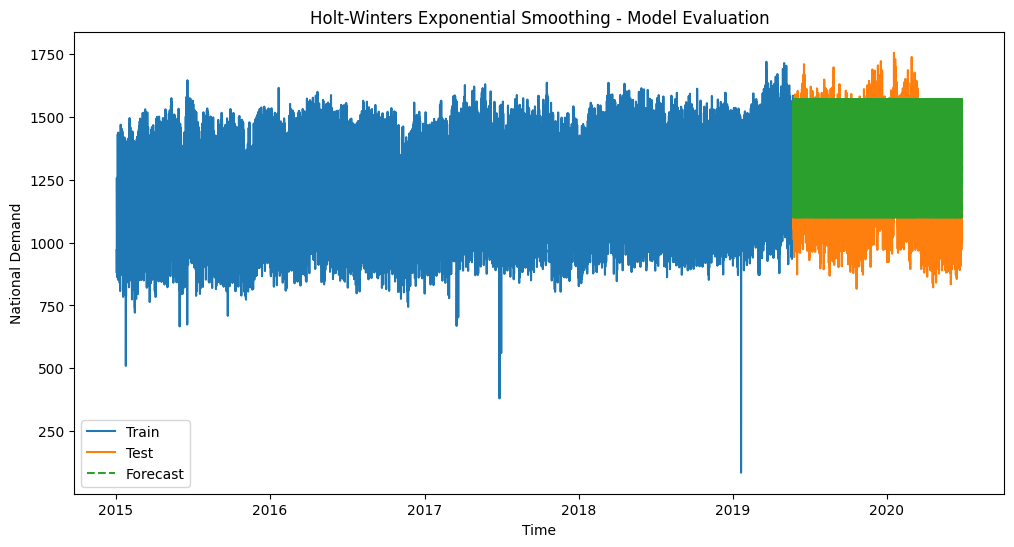

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('National Demand')
plt.title('Holt-Winters Exponential Smoothing - Model Evaluation')
plt.legend()
plt.show()


## Metrics For Evaluation

Mean Squared Error (MSE): 38516.520350110965

Mean Absolute Error (MAE): 153.14030444497863

Root Mean Squared Error (RMSE): 196.2562619385964

Error rate very high for this forecasting.

## Autoregression (AR) Model

In [31]:
!pip install pandas statsmodels matplotlib scikit-learn


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [35]:

data = df['nat_demand']['2015-01-03':'2020-06-27']


In [36]:

split_point = int(len(data) * 0.8)
train, test = data[:split_point], data[split_point:]


In [37]:
model = AutoReg(train, lags=24)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


In [38]:
model = AutoReg(train, lags=24)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


In [39]:
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 35138.881423173894
Mean Absolute Error (MAE): 151.59841276896748
Root Mean Squared Error (RMSE): 187.45367807320798


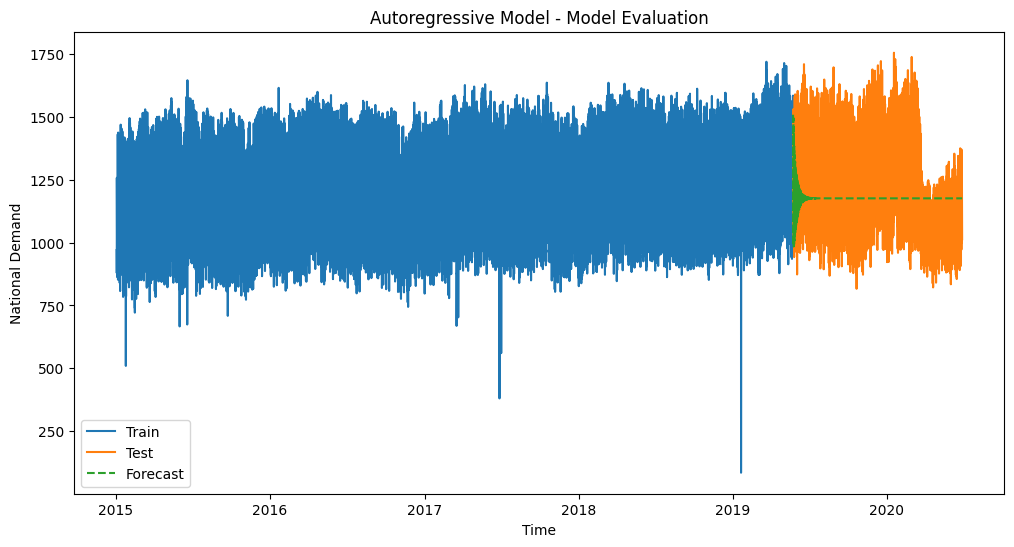

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('National Demand')
plt.title('Autoregressive Model - Model Evaluation')
plt.legend()
plt.show()


In this model metrics are little bit better

Mean Squared Error (MSE): 35138.881423173894
Mean Absolute Error (MAE): 151.59841276896748
Root Mean Squared Error (RMSE): 187.45367807320798